# Week 5 handin

## 01 Assignment
## Ex1 Use data from Danmarks Statistik - Databanken
1. Go to https://www.dst.dk/da/Statistik/brug-statistikken/muligheder-i-statistikbanken/api#testkonsol
2. Open 'Konsol' and click 'Start Konsol'
3. In the console at pt 1: choose 'Retrieve tables', pt 2: choose get request and json format and pt 3: execute:
  1. check the result
  2. in the code below this same get request is used to get information about all available data tables in 'databanken'. 
4. Change pt. 1 in the console to 'Retrieve data', pt 2: 'get request' and Table id: 'FOLK1A', format: csv, delimiter: semicolon and click: 'Variable and value codes' and choose some sub categories (Hint: hover over the codes to see their meaning). Finally execute and see what data you get.
5. With data aggregation and data visualization answer the following questions:
  1. What is the change in pct of divorced danes from 2008 to 2020?
  2. Which of the 5 biggest cities has the highest percentage of 'Never Married' in 2020?
  3. Show a bar chart of changes in marrital status in Copenhagen from 2008 till now
  4. Show 2 plots in same figure: 'Married' and 'Never Married' for all ages in DK in 2020 (Hint: x axis is age from 0-125, y axis is how many people in the 2 categories). Add lengend to show names on graphs
  
## Ex2 Use another table (extra)
Choose any of the other tables in 'databanken' to find interesting data.
1. Collect the data
2. Pose 5 or more interesing questions to the data
3. Answer the questions by aggregating the data
4. Illustrate the answers with visual plots

## 02 Status
Jeg har lavet Ex1

## 03 Solution part 1

In [1]:
import pandas as pd 

# opg 5.A
sb = pd.read_csv('https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&OMR%C3%85DE=000&K%C3%98N=TOT&Tid=2008K4%2C2020K4&CIVILSTAND=U', sep=';')
sb['INDHOLD'].pct_change()*100

0          NaN
1    11.325238
Name: INDHOLD, dtype: float64

In [2]:
# opg 5.B
url = 'https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&OMR%C3%85DE=851%2C751%2C561%2C461%2C101&CIVILSTAND=U%2CTOT&Tid=2020K4'
sb = pd.read_csv(url, sep=';')
ugift = sb[sb['CIVILSTAND']== 'Ugift']
i_alt = sb[sb['CIVILSTAND']== 'I alt']
procent = (i_alt['INDHOLD'] / ugift['INDHOLD'].sum()) * 100
procent

1    23.872529
3    38.473512
5    12.572292
7    22.410743
9    69.441182
Name: INDHOLD, dtype: float64

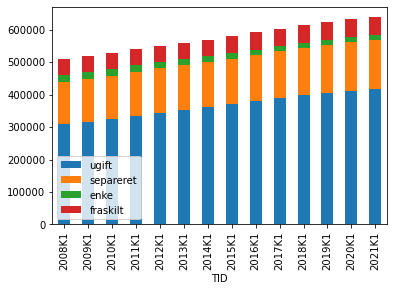

In [3]:
# opg 5.C
url = 'https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&OMR%C3%85DE=101&Tid=2008K1%2C2009K1%2C2010K1%2C2011K1%2C2012K1%2C2013K1%2C2014K1%2C2015K1%2C2016K1%2C2017K1%2C2018K1%2C2019K1%2C2020K1%2C2021K1&CIVILSTAND=U%2CG%2CE%2CF'
sb = pd.read_csv(url, sep=';')
ugift = sb[sb['CIVILSTAND']== 'Ugift']['INDHOLD']
separeret = sb[sb['CIVILSTAND']=='Gift/separeret']['INDHOLD']
enke = sb[sb['CIVILSTAND']== 'Enke/enkemand']['INDHOLD']
fraskilt = sb[sb['CIVILSTAND']==  'Fraskilt']['INDHOLD']
tid = sb[sb['CIVILSTAND']== 'Ugift']['TID']

ad = {'TID': tid, 'ugift': ugift.tolist(),'separeret': separeret.tolist(), 'enke': enke.tolist(), 'fraskilt': fraskilt.tolist()}
sb = pd.DataFrame(ad)
sb = sb.set_index('TID')


sb.plot.bar(stacked=True)

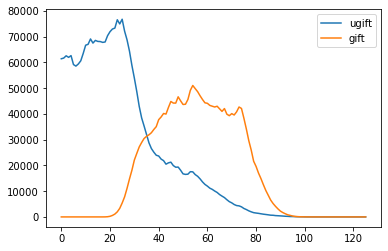

In [4]:
# opg 5.D
url = 'https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&CIVILSTAND=U%2CG&Tid=2020K4&ALDER=*'
sb = pd.read_csv(url, sep=';')
alder = sb['ALDER'][1:127]
ugift = sb[(sb['CIVILSTAND']== 'Ugift') & (sb['ALDER']!= 'I alt')]['INDHOLD']
gift = sb[(sb['CIVILSTAND']=='Gift/separeret') & (sb['ALDER']!= 'I alt')]['INDHOLD']


ad = {'alder': alder.tolist(), 'ugift': ugift.tolist(), 'gift':gift.tolist()}
sb = pd.DataFrame(ad)
sb.plot()